* Table of contents
* Measuring center
* Mean
* Arithmetic Mean
* Geometric Mean
* Median
* Mode
* Measuring spread (variability)
* Range
* Interquartile Range (IQR)
* Percentiles
* Variance and Standard deviation
* Comparison with IQR
* Distribution graph
* Mean Absolute Deviation (MAD)
* Box and whisker plots


* Introduction
* Quantitative data is information that can be measured in real numbers. Examples include,

* Height of a person
* Speed of Tesla cars
* Runs scored by a batsman
* Wickets taken by a bowler
* In this notebook, we'll explore various statistical concepts involved in summarizing quantitative data with the help of Indian Premier League (IPL) dataset.

* The data consists of two CSV files for all IPL matches played from 2008 - 2018 (11 seasons)

* matches.csv - match-by-match data
* deliveries.csv - ball-by-ball data
* Let's setup pandas dataframes for the above files and import necessary libraries.

In [5]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import os


matches    = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
matches.head(1)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [2]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [4]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


Let's inspect the matches data before stepping into the concepts

In [10]:
print(f'Number of rows    = {len(matches)}')
print(f'Number of columns = {len(matches.columns)}')


Number of rows    = 756
Number of columns = 18


* Measuring center
* First step often learnt in descriptive statistics is to measure the center of given data. There are various ways to measure the center. We'll go through some of them.

* Let's get the data ready for our experiments.

* win_by_runs columns represents the margin in which a team has won against the opponent, if the team batting first has won.
* i.e. If team1 scores 200 runs and team2 scores 150 runs, team1 won the match by 50 runs - If team1 bats first
* Hence, we have to exclude all instances of win_by_wickets cases, i.e. win_by_runs = 0

In [11]:
win_by_runs_data = matches[matches['win_by_runs'] > 0].win_by_runs
print(f'Number of rows = {len(win_by_runs_data)}')
win_by_runs_data.head()

Number of rows = 337


0     35
4     15
8     97
13    17
14    51
Name: win_by_runs, dtype: int64

* Mean
* Mean (usuallly refered to Arithmetic Mean, also called Average) is calculated as sum of all numbers in the dataset and dividing by the total number of values

* Arithmetic Mean
* Arithmeticmean=Sumofallnumbers/No.ofvaluesinthesetor
 
* x¯=∑ni=ixi/n
 
* Arithmetic mean of our data is calculated as,

* mean = (35 + 15 + 97 + 17 + ...) / 315

Let's do that in code.

In [12]:
win_by_runs_rows = len(win_by_runs_data) # No. of values in the set (n)
win_by_runs_sum = sum(win_by_runs_data) # Sum of all numbers

print(f'Sum of all numbers = {win_by_runs_sum}, No. of values in the set = {win_by_runs_rows}')

win_by_runs_arithmetic_mean = win_by_runs_sum / win_by_runs_rows # Calculating arithmetic mean
print(f'Arithmetic mean = {win_by_runs_arithmetic_mean}')

Sum of all numbers = 10042, No. of values in the set = 337
Arithmetic mean = 29.798219584569733


We can verify the number with the help of mean() method in pandas

In [13]:
win_by_runs_arithmetic_mean_verify = win_by_runs_data.mean()
print(f'Arithmetic mean (verify) = {win_by_runs_arithmetic_mean_verify}')

Arithmetic mean (verify) = 29.798219584569733


* Geometric Mean
* Another type of mean is geometric mean. It is calculated as Nth root of product of all the numbers, where N is the total number of values in the dataset

* Geometric mean of our data is calculated as,

* geometric_mean = 315thRoot(35 x 15 x 97 x 17 x ...)

In [14]:
win_by_runs_geo_mean = stats.mstats.gmean(win_by_runs_data)
print(f'Geometric mean = {win_by_runs_geo_mean}')

Geometric mean = 19.24102896835606


* Median
* Median is the middle value, when the data is sorted in ascending order. Half of the data points are smaller and half of data points are larger than the median.

* For example purpose, let's take first 10 entries of the data.

In [15]:
win_by_runs_10 = list(win_by_runs_data[:10])
print(win_by_runs_10)
print(sorted(win_by_runs_10))

[35, 15, 97, 17, 51, 27, 5, 21, 15, 14]
[5, 14, 15, 15, 17, 21, 27, 35, 51, 97]


* To find median,

* Sort the data from smallest to largest (ascending order)
* If there are odd number of data points, median is the middle data point.
* If there are even number of data points, median is the average of two middle data points
* [5, 14, 15, 15, 17, 21, 27, 35, 51, 97]
                ^^  ^^  
           (middle numbers)

* Median = (17 + 21)/2 = 19

In [16]:
win_by_runs_10_median = win_by_runs_data[:10].median()
print(f'Median (first 10) = {win_by_runs_10_median}')

win_by_runs_median = win_by_runs_data.median()
print(f'Median = {win_by_runs_median}')

Median (first 10) = 19.0
Median = 22.0


* Mode
* Mode is the number occurring most often in the dataset.

* It is only meaningful if we have many repeated values in our dataset
* If no value is repeated, there is no mode
* A dataset can have one mode, multiple modes or no mode.
* Let's try to retrieve mode for our dataset.

In [17]:
# Retrieve frequency (sorted, descending order)
win_by_runs_data.value_counts(sort=True, ascending=False).head()

14    13
10    11
4     11
1     10
13     9
Name: win_by_runs, dtype: int64

In [ ]:
As we can observe, [4, 14] occurs 11 times in the dataset.

Hence, Mode = [4, 14],

In [18]:
win_by_runs_data_mode = win_by_runs_data.mode()
print(f'Mode = {list(win_by_runs_data_mode)}')

Mode = [14]


* Measuring spread (variability)
* By just measuring the center of the data, one wouldn't get much idea about the dataset. There are various ways of measuring how the data is spread.

* Range
* Range is the simplest form of measuring variability. It is the difference between largest number and smallest number.

In [19]:
win_by_runs_max = win_by_runs_data.max()
win_by_runs_min = win_by_runs_data.min()
win_by_runs_range = win_by_runs_max - win_by_runs_min

print(f'Largest = {win_by_runs_max}, Smallest = {win_by_runs_min}, Range = {win_by_runs_range}')

Largest = 146, Smallest = 1, Range = 145


* Interquartile Range (IQR)
* Interquartile range or IQR is the amount spread in middle 50% of the dataset or the distance between first Quartile (Q₁) and third Quartile (Q₃)

* First Quartile (Q₁) = Median of data points to left of the median in ordered list (25th percentile)
* Second Quartile (Q₂) = Median of data (50th percentile)
* Third Quartile (Q₃) = Median of data points to right of the median in ordered list (75th percentile)
* IQR = Q₃ - Q₁

* [41, 48, 58, 60, 60, 67, 69, 71, 75, 78, 81, 83, 89, 89, 91, 92, 94, 94, 96, 98]
 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              first half                              second half
 *       median = (60 + 67) / 2 = 63.5         median = (91 + 92) / 2 = 91.5

* Q₁ = 63.5
* Q₃ = 91.5
* IQR = Q₃ - Q₁ = 91.5 - 63.5 = 28

win_by_runs_25_perc = stats.scoreatpercentile(win_by_runs_data, 25)
win_by_runs_75_perc = stats.scoreatpercentile(win_by_runs_data, 75)

win_by_runs_iqr = stats.iqr(win_by_runs_data)
print(f'Q1 (25th percentile) = {win_by_runs_25_perc}')
print(f'Q3 (75th percentile) = {win_by_runs_75_perc}')
print(f'IQR = Q3 - Q1 = {win_by_runs_75_perc} - {win_by_runs_25_perc} = {win_by_runs_iqr}')

* Percentiles
* Percentile is a number where certain percentage of numbers fall below that number.

* Taking the above example,

* 25th percentile = 11 → 25% of the matches are won by less thant 11 runs.
* 75th percentile = 38 → 75% of the matches are won by less than 38 runs.
* Percentile can be calculated using scipy.stats.scoreatpercentile

* To calculate 95th percentile,

In [20]:
win_by_runs_95_perc = stats.scoreatpercentile(win_by_runs_data, 95)
print(f'95th percentile = {win_by_runs_95_perc}')

95th percentile = 86.0


## Variance and Standard deviation

Standard deviation and variance measures the spread of a dataset. If the data is spread out largely, standard deviation (and variance) is greater. 

In other terms, 
* if more data points are closer to the mean, standard deviation is less
* if the data points are further from the mean, standard deviation is more

Formula for variance for **population** is given as,

$$
\begin{align}
Variance\,=\sigma^2 = {\sum_{i=i}^{n}{(x_i - \mu)}^2 \over n}
\end{align}
$$

where, $\mu$ is the **mean** of the dataset

Standard deviation is just the square root of variance

$$
\begin{align}
Standard\,deviation\,=\sigma = \sqrt{\sum_{i=i}^{n}{(x_i - \mu)}^2 \over n}
\end{align}
$$

> **Note**:
>
> For **Sample**, we use `n - 1` instead of `n`,  $\bar{x}$ - mean of sample

$$
\begin{align}
Standard\,deviation\,=S_{sample} = \sqrt{\sum_{i=i}^{n}{(x_i - \bar{x})}^2 \over n - > 1}
\end{align}
$$

Let's take `win_by_wickets` dataset.

In [21]:
win_by_wickets_data = matches[matches.win_by_wickets > 0].win_by_wickets
print(f'Number of rows = {len(win_by_wickets_data)}')
win_by_wickets_data.head()

Number of rows = 406


1     7
2    10
3     6
5     9
6     4
Name: win_by_wickets, dtype: int64

In [22]:
# Step 1: calculate mean(μ)
win_by_wickets_mean = win_by_wickets_data.mean()
print(f'Mean = {win_by_wickets_mean}')

# Step 2: calculate numerator part - sum of (x - mean)
win_by_wickets_var_numerator = sum([(x - win_by_wickets_mean) ** 2 for x in win_by_wickets_data])

# Step 3: calculate variane
win_by_wickets_variance = win_by_wickets_var_numerator / len(win_by_wickets_data)
print(f'Variance = {win_by_wickets_variance}')

# Step 4: calculate standard deviation
win_by_wickets_standard_deviation = math.sqrt(win_by_wickets_variance)
print(f'Standard deviation = {win_by_wickets_standard_deviation}')

Mean = 6.238916256157635
Variance = 3.3246924215583893
Standard deviation = 1.8233739116150558


In [23]:
win_by_wickets_standard_deviation_verify = win_by_wickets_data.std(ddof = 0)
print(f'Standard deviation = {win_by_wickets_standard_deviation_verify}')

Standard deviation = 1.8233739116150558


i.e. matches are won by an average of 6.28 wickets with standard deviation of 1.83 (spread = 6.28 $\pm$ 1.83)
​
### Comparison with IQR
​
IQR is calculated with respect to **median**, Standard deviation is calculated with respect to **mean**.
​
Let's compare those for `win_by_runs` data

In [24]:
win_by_runs_std = win_by_runs_data.std(ddof = 0)
print(f'| Mean               = {win_by_runs_arithmetic_mean} | Median  = {win_by_runs_median} |')
print(f'| Standard deviation = {win_by_runs_std} | IQR     = {win_by_runs_iqr} |')

| Mean               = 29.798219584569733 | Median  = 22.0 |


NameError: name 'win_by_runs_iqr' is not defined

For this particular data, standard deviation and IQR are pretty close by, although it won't be the scenario always.
​
## Distribution graph
​
Let's plot the frequency distribution graph for `win_by_wickets` data since we can have values from 1 - 10.

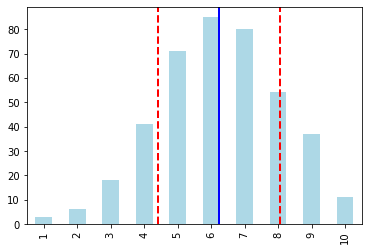

In [25]:
win_by_wickets_dist = win_by_wickets_data.value_counts(sort=False)
plt = win_by_wickets_dist.plot.bar(color='lightblue')
plt.axvline(x = win_by_wickets_mean - 1, color='blue', linewidth=2.0)
plt.axvline(x = win_by_wickets_mean - win_by_wickets_standard_deviation - 1, color='red', linewidth=2.0, linestyle='dashed')
plt.axvline(x = win_by_wickets_mean + win_by_wickets_standard_deviation - 1, color='red', linewidth=2.0, linestyle='dashed')

## Mean Absolute Deviation (MAD)
​
**Mena absolute deviation** is the average distance between mean and each data point.
​
$$
\begin{align}
Mean\,absolute\,deviation\,(MAD) = {\sum{\lvert x_i - \bar{x} \rvert} \over n}
\end{align}
$$
​
Let's calculate mean absolute deviation for `win_by_runs`

In [26]:
win_by_runs_mad = win_by_runs_data.mad()
print(f'Mean absolute deviation = {win_by_runs_mad}')

Mean absolute deviation = 20.089144044589645


## Box and whisker plots
​
**Box and whisker plots** (or box plots) represents five-number summary of the dataset. The five-number values are,
1. Minimum
2. First quartile (25th percentile)
3. Median (50th percentile)
4. Third quartile (75th percentile)
5. Maximum
​
The following is a representation of box-and-whisker plot
​
![Box-whisker plot](https://raw.githubusercontent.com/nowke/nowke.github.io/gh-pages/src/pages/stats/images/box-whisker-plot.png)

C:\ANACONDA\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:298: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  bp = ax.boxplot(values, **kwds)


Text(0.5, 0, 'Win by runs')

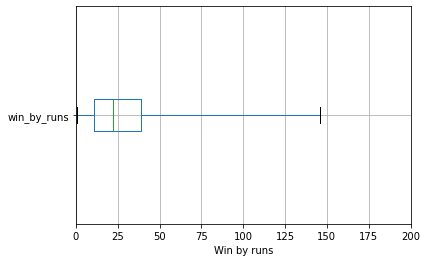

In [27]:
plt = win_by_runs_data.to_frame().boxplot(whis='range', vert=False)
plt.set_xlim([0, 200])
plt.set_xlabel('Win by runs')

There's one problem with this graph. We have outliers to the right of the graphs. Instead of showing **min** and **max** as the two ends of the whisker, we calculate the following.
​
* Lower fence = $Q_1 - 1.5 \times IQR$,
* Upper fence = $Q_3 + 1.5 \times IQR$
​
Note the `whis` parameter in the above code set to `range`. By default `whis` is set to `1.5`.

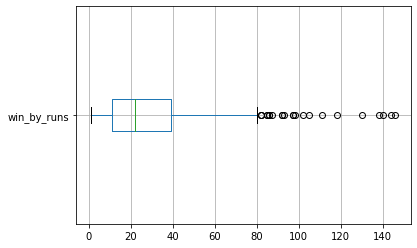

In [28]:
win_by_runs_data.to_frame().boxplot(vert=False)